# Prediction Analysis on Student's Dropout

In [250]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [251]:
# Read dataset from csv file
data =  pd.read_csv("/student's dropout dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Descriptive analysis

In [252]:
data.shape

(4424, 35)

We have 4,424 observations (rows) and 35 features (Columns)

In [253]:
# descriptive analysis
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [254]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [255]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

From the target column we can infer the following:
* Dropout: This means for that particular observation, the student dropped out
* Graduate: The student is a graduate
* Enrolled: The student is currently enrolled

#Exploratory Data Analysis

In [256]:
# Create a copy for exploratory data analysis
data_viz = data.copy()

In [257]:
data_viz.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [258]:
#Checking for null values
data_viz.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                            False
Scholarship holder                                False
Age at enrollment                               

In [259]:
data_viz['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

From original data set, the Matrital status column was converted to numerical values from 1 to 6 and we cant tell which numbers belong to single, married or divorced. Due to this, marital status column is dropped

In [260]:
# dropping marital status
data_viz.drop('Marital status', axis=1, inplace= True)

In [261]:
data_viz.head()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,8,5,2,1,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,6,1,11,1,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,5,1,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,8,2,15,1,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,12,1,3,0,1,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


The following columns/features have unique values of 0 and 1

* Displaced,
* Educational special needs,
* Debtor,
* Tuition fees up to date,
* Scholarship holder
* International

For the purpose of EDA we will convert these values to categorical values 'Yes' and 'No' for easy visualization

In [262]:
to_convert = ['Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
for i in to_convert:
    data_viz[i] = data_viz[i].map({1:'Yes', 0: 'No'})

In [263]:
# Daytime/evening attendance is converted to day and night
data_viz['Daytime/evening attendance'] = data_viz['Daytime/evening attendance'].map({1: 'Day', 0: 'Night'})

In [264]:
# Converting the gender column
data_viz.Gender.unique()

array([1, 0])

Although they have unique values of 0 and 1, it is impossible to determine which is assigned to a male and which is female. So we drop the column after vsualization has been done

<Axes: xlabel='Target', ylabel='Count'>

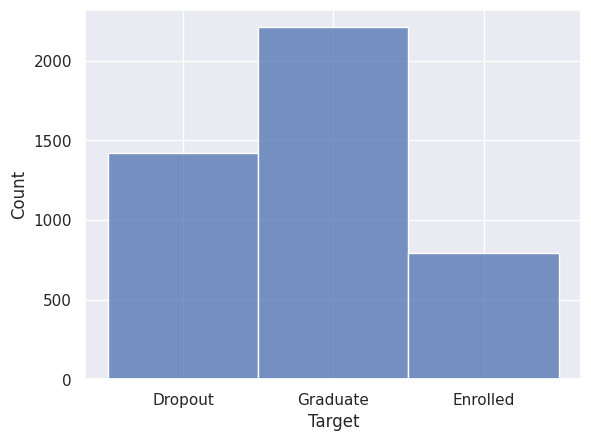

In [265]:
# First create a histogram to view the distribution of Dropouts, Graduates and Enrolled

sns.histplot(data_viz['Target'])

The graph shows there are more Dropouts than those currently Enrolled

<Axes: xlabel='Age at enrollment', ylabel='Count'>

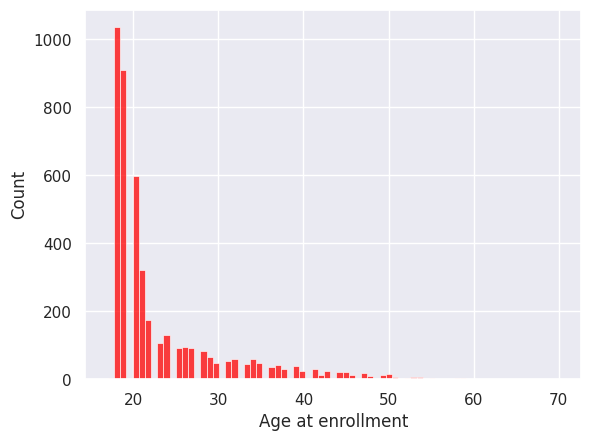

In [266]:
# Histogram plot showing the age distribution of students
sns.histplot(data_viz['Age at enrollment'], color='red')

Distribution shows that majority of the students are in their late teen's to early 20's

## Distribution of students that Dropped out

In [267]:
# Viewing age distribution of students that dropped out vs those that enrolled and those that are graduates
data_viz_dropout = data_viz[data_viz['Target'] == 'Dropout']
data_viz_enrolled = data_viz[data_viz['Target'] == 'Enrolled']
data_viz_graduate = data_viz[data_viz['Target'] == 'Graduate']


Text(0.5, 1.0, 'Graduate')

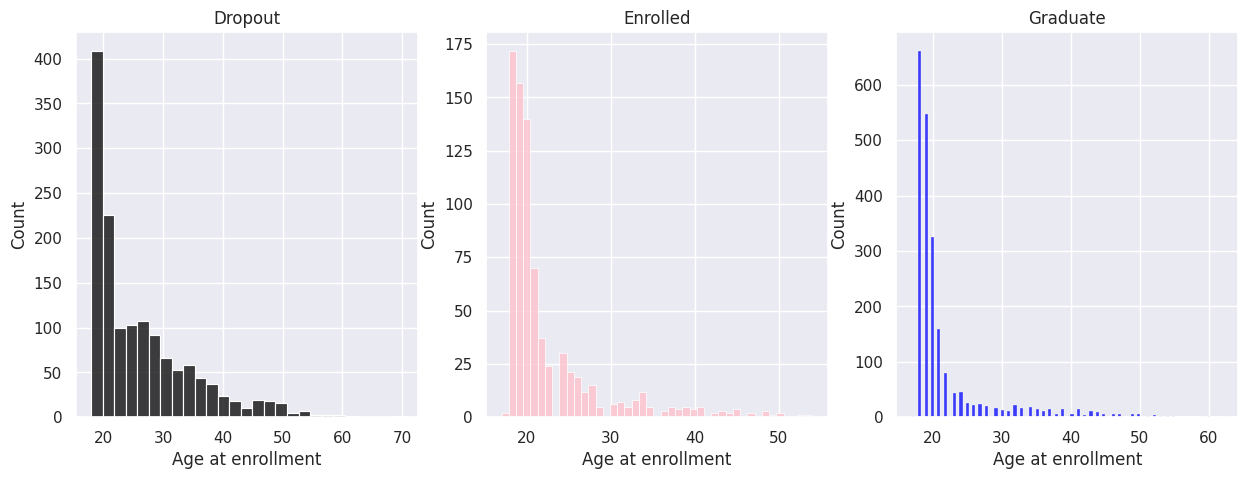

In [268]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data_viz_dropout['Age at enrollment'], color='black', ax=axes[0])
axes[0].set_title('Dropout')

sns.histplot(data_viz_enrolled['Age at enrollment'], color='pink', ax=axes[1])
axes[1].set_title('Enrolled')

sns.histplot(data_viz_graduate['Age at enrollment'], color='blue', ax=axes[2])
axes[2].set_title('Graduate')



Below is histogram plot that shows the count relationship between:

* Debtors
* International students
* Tuition fees
* Day and evening attendance

<Axes: xlabel='International', ylabel='Count'>

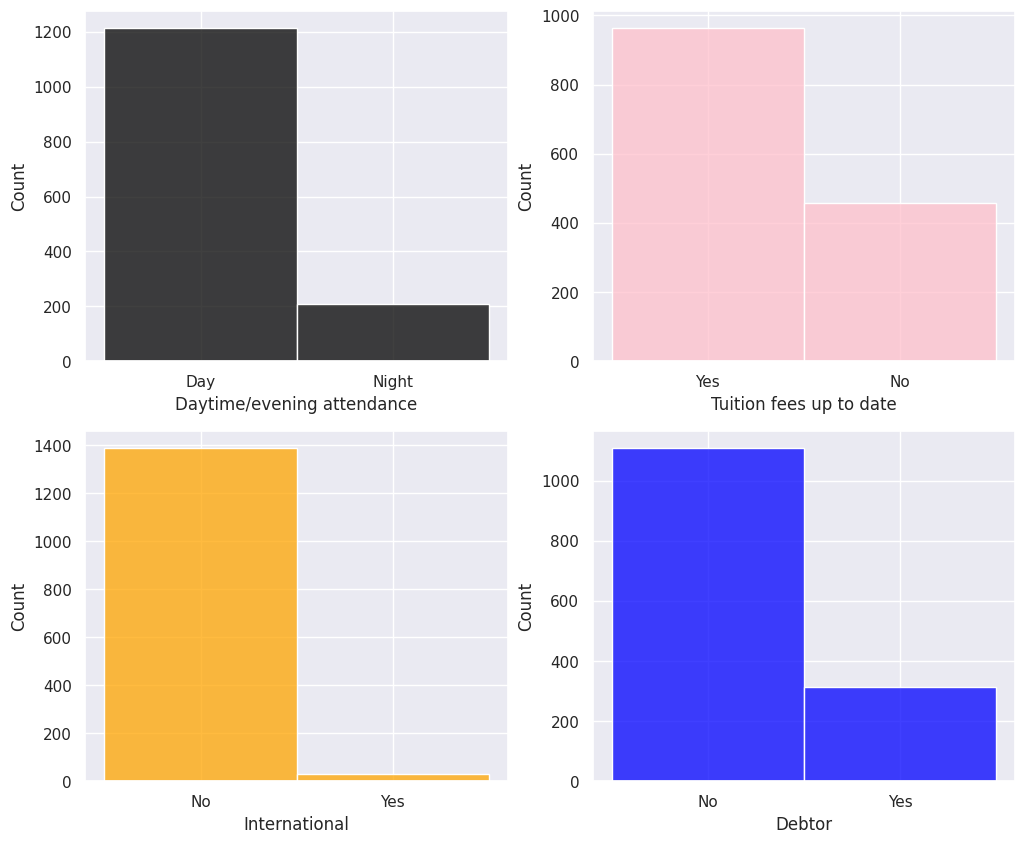

In [269]:
fig, axes = plt.subplots(2, 2, figsize = (12,10))

sns.histplot(data_viz_dropout['Daytime/evening attendance'], color= 'black', ax=axes[0][0])
sns.histplot(data_viz_dropout['Tuition fees up to date'], color= 'pink', ax=axes[0][1])
sns.histplot(data_viz_dropout['Debtor'], color= 'blue', ax=axes[1][1])
sns.histplot(data_viz_dropout['International'], color='orange', ax=axes[1][0])

From the results we can infer that majority of the students who dropped out attend day time class, are not international students, are not in debt and have their tuition fees are up to date.

## Data Processing
 Before standardizing the data we need to figure out relevant features to transform them

 The target feature is in categorical form and needs to be converted numerical data.

In [270]:
#Get dummies for Target columns
dummies = pd.get_dummies(data['Target'])

#Drop all columns except that for Dropout
dummies.drop(['Enrolled',	'Graduate'], axis = 1, inplace= True)
data['Target'] = dummies
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


## Evaluating features that have more influence on target/outcome

The easiest way to view features that influence the outcome (dropout or not dropout) is through correlation analysis. There are some features that would either have a significant positive correlation or negetive correlation to the target.

We can visualize this using heatmaps

Text(0.5, 1.0, 'Correlation of less significant features')

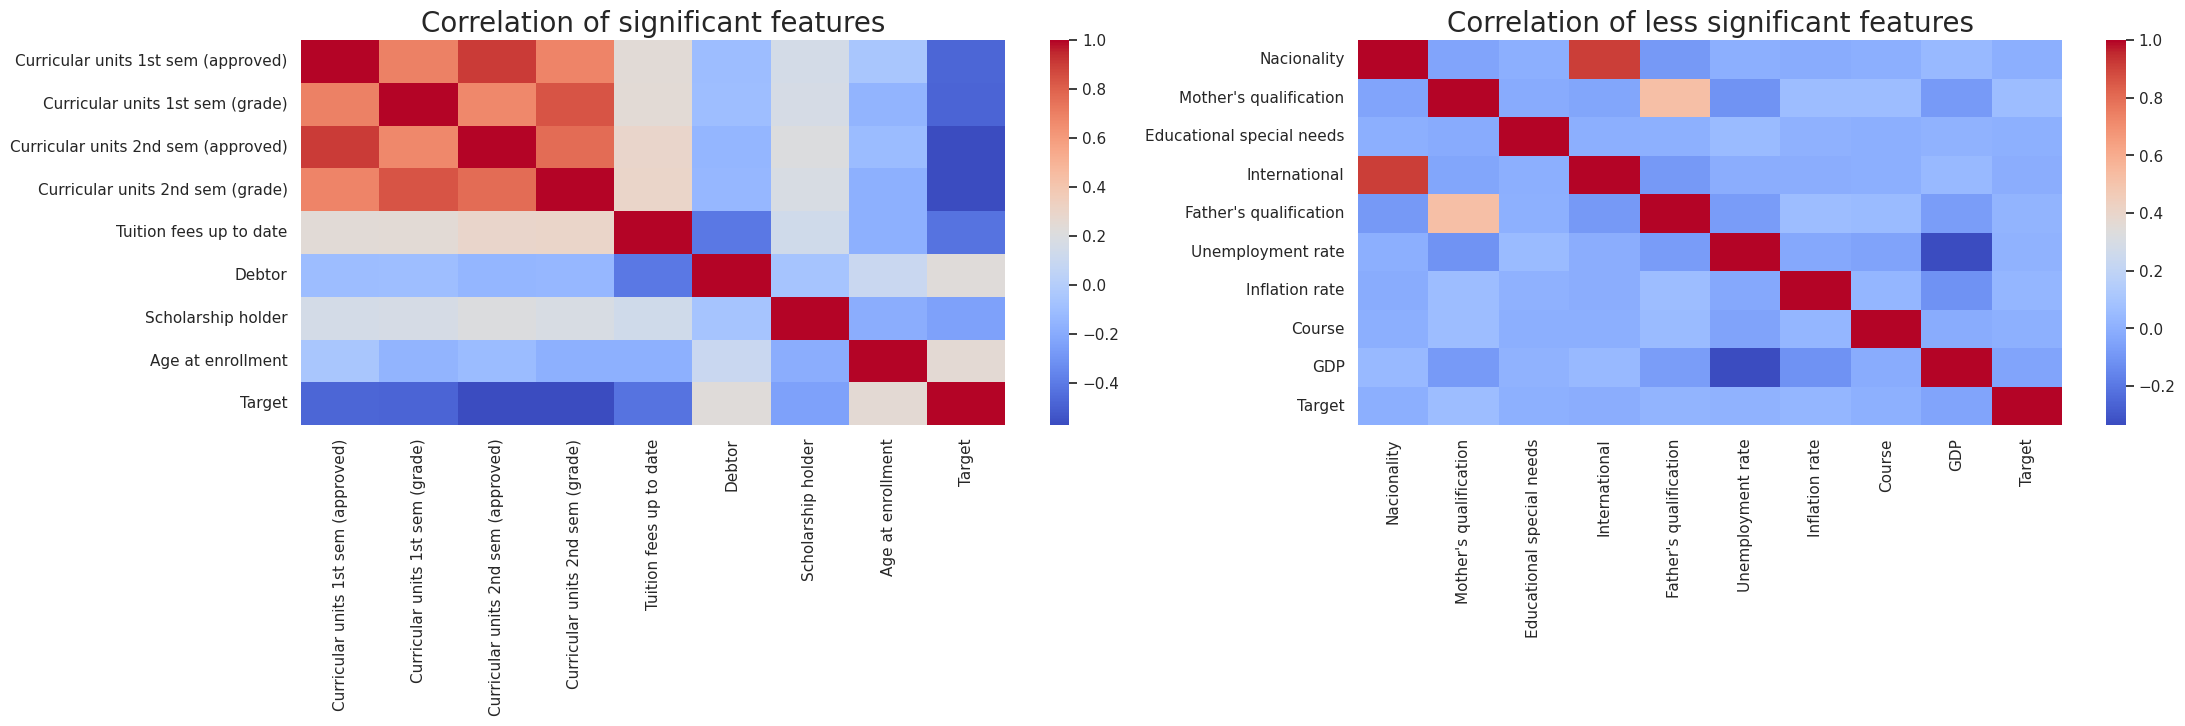

In [271]:
fig, axes = plt.subplots(1, 2, figsize = (25,5))


sns.heatmap(data[[ 'Curricular units 1st sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 2nd sem (approved)',
'Curricular units 2nd sem (grade)',
'Tuition fees up to date',
'Debtor',
'Scholarship holder', 'Age at enrollment', "Target"]].corr(), cmap = 'coolwarm', ax=axes[0])
axes[0].set_title('Correlation of significant features', fontsize = 20)

sns.heatmap(data[["Nacionality",
                  "Mother's qualification",
                  "Educational special needs",
                  "International",
                  "Father's qualification",
                  "Unemployment rate", "Inflation rate",
                  "Course", "GDP", "Target"]].corr(), cmap = 'coolwarm', ax=axes[1])
axes[1].set_title('Correlation of less significant features', fontsize = 20)

From the heatmap, we can interpret that the following factors have more influence on the target:
* Age at enrollment
* Tuition fees up to date
* Debt
* Grades for Curricular units 1st and 2nd semester
* Approved units for 1st and 2nd semester
* Scholarship holders
* Parents's occupation

## Normalizing data

Before standardizing the data we assigin values to X_features and Y (Target column)

In [272]:
Y = np.array(data['Target'])
X_features = data.drop('Target', axis = 1)
X_features.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [273]:
Y[:5]

array([1, 0, 1, 0, 0], dtype=uint8)

In [274]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X = scaler.fit_transform(X_features)
X


array([[-0.29482875,  0.21006857,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.16740639, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.11109377, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.35614386, -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

## Using Machine Learning classification models

Since the nature of the target is decision based (Dropout (1) or not (0), we will use the following features to predict the state of a student

In [275]:
# importing model selection
from sklearn.model_selection import train_test_split

# importing evaluation metrics
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Using Logistic Regression

In [276]:

from sklearn.linear_model import LogisticRegression
# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = lr_model.predict(X_test)

# Confusion Matrix
lr_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
lr_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of logistic regression model is {round(lr_acc * 100, 2)}%')


Accuracy of logistic regression model is 87.34%


Next we will try other classification models to see if we can achieve a better accuracy

## Using Decision Trees

In [277]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = tree_model.predict(X_test)

# Confusion Matrix
tree_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
tree_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision tree model is {round(tree_acc * 100, 2)}%')

Accuracy of Decision tree model is 82.15%


## Using Support Vector Machines

In [278]:
# Iterating to see which kernel gives the best result
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score_list = {}
scores = 0
from sklearn.svm import SVC

for k in kernels:
    svm_model = SVC(kernel= k)
    svm_model.fit(X_train, y_train)
    f_score = svm_model.score(X_test, y_test)
    score_list.update({k: f_score})

score_list

{'linear': 0.8677966101694915,
 'poly': 0.8564971751412429,
 'rbf': 0.8621468926553673,
 'sigmoid': 0.8214689265536723}

The results show that **Liner kernel** performs the best

In [279]:
# Train a SVC model
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = svm_model.predict(X_test)

# Confusion Matrix
svm_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
svm_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of Support vector classifier model is {round(svm_acc * 100, 2)}%')

Accuracy of Support vector classifier model is 86.78%


## Using Random forest

In [280]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = rf_model.predict(X_test)

# Confusion Matrix
rf_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
rf_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random forest classifier model is {round(svm_acc * 100, 2)}%')



Accuracy of Random forest classifier model is 86.78%


## Using K- Nearest Neighbours

We use the elbow method to determine the optimal K value

In [281]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
accuracy = []
for i in range(1,21):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy Score')

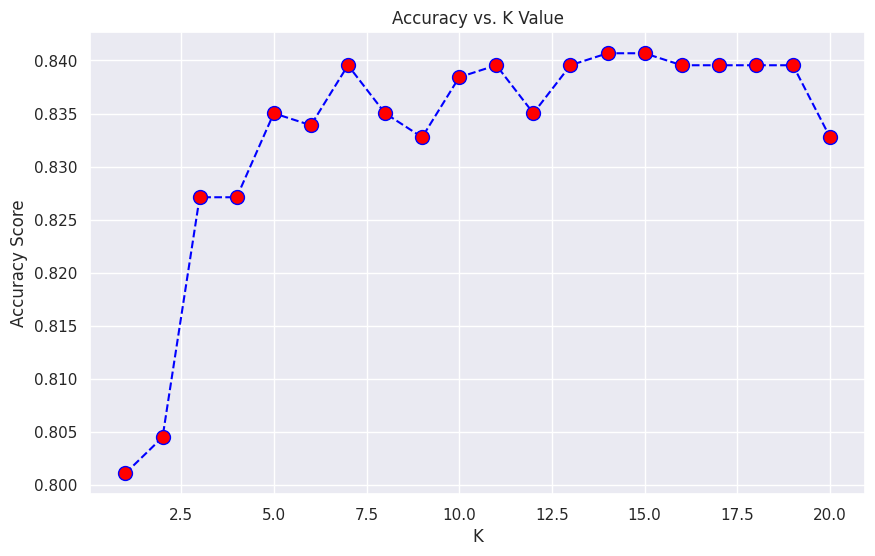

In [282]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [283]:
k = accuracy.index(max(accuracy))

In [284]:
from IPython.display import Markdown
Markdown(f"""
#### From the result we can determine that the optimal k- value with the highest score {k}""")


#### From the result we can determine that the optimal k- value with the highest score 13

In [285]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = knn_model.predict(X_test)

# Confusion Matrix
knn_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
knn_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN model is {round(knn_acc * 100, 2)}%')

Accuracy of KNN model is 83.95%


## Confusion matrix for each classification model

For each model we would view which of them performs the best.

Text(0.5, 1.0, 'Accuracy performance of classification models')

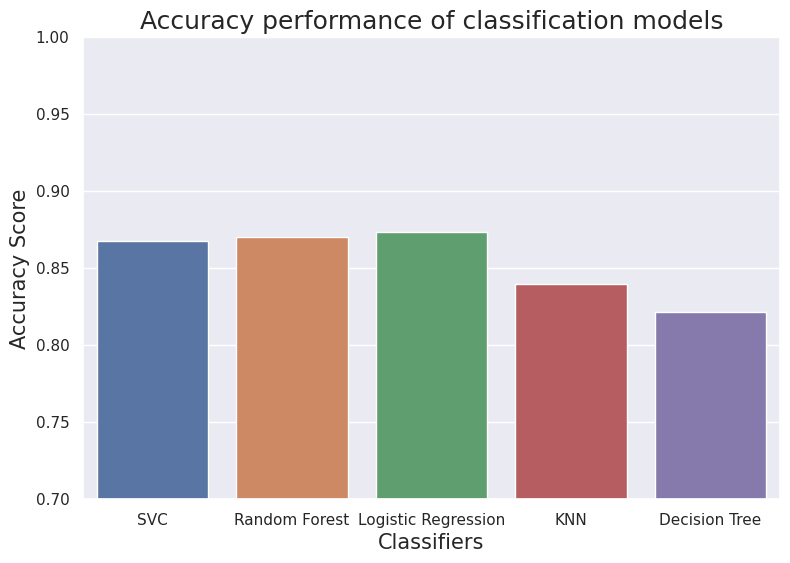

In [286]:
# Bar plot showing each classifier
plt.figure(figsize = (9,6))
accuracy_of_models = {'SVC': svm_acc,
                      'Random Forest': rf_acc,
                      'Logistic Regression': lr_acc,
                      'KNN': knn_acc,
                      'Decision Tree':tree_acc}


sns.barplot(x = list(accuracy_of_models.keys()), y= list(accuracy_of_models.values()))
plt.ylim(0.7,1)

plt.xlabel('Classifiers', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Accuracy performance of classification models', fontsize = 18)

## Viewing the confusion maxtix of the best classifier

In [287]:
# Dictionary for each classifier confusion matrix
cm_of_models = {'SVC': svm_matrix,
                      'Random Forest': rf_matrix,
                      'Logistic Regression': lr_matrix,
                      'KNN': knn_matrix,
                      'Decision Tree':tree_matrix}


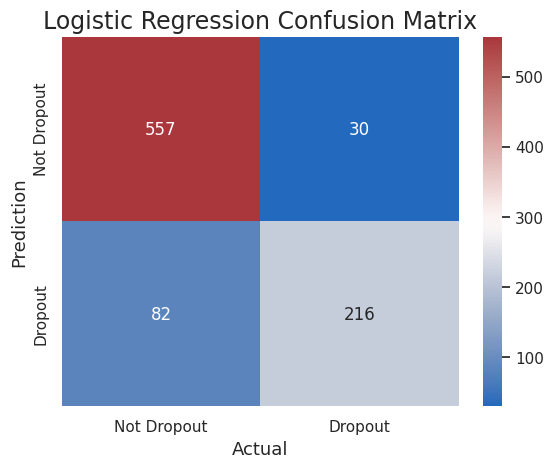

In [288]:
# Find the highest score
scores = [svm_acc, rf_acc, lr_acc, knn_acc, tree_acc]
best_score = max(scores)
best_model = ''

# Generate a heatmap for the classifier that has the highest score
for key, value in accuracy_of_models.items():
  if best_score == value:
    best_model = key
    sns.heatmap(cm_of_models[key], annot = True, fmt = 'g', cmap = 'vlag', xticklabels=['Not Dropout','Dropout'],
            yticklabels=['Not Dropout','Dropout'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title(key + ' Confusion Matrix',fontsize=17)
    cm_of_models.pop(key)

Viewing the confusion matrix for other classifiers

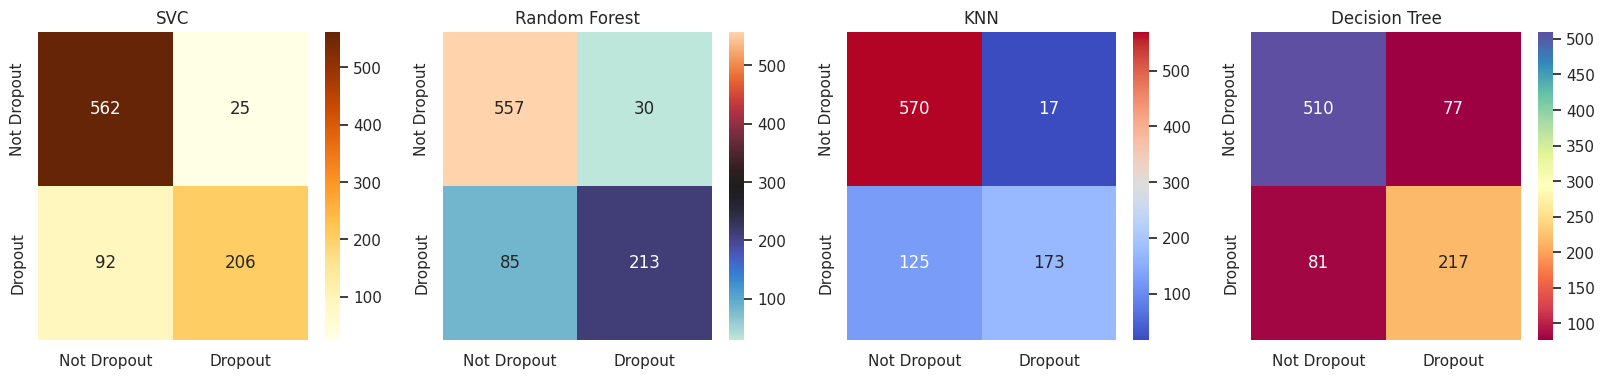

In [289]:
fig, axes = plt.subplots(1, 4, figsize = (20,4))

# Set colors for each heatmap
colors = ['YlOrBr', 'icefire', 'coolwarm', 'Spectral']
position = 0

for key, value in cm_of_models.items():
  sns.heatmap(value, annot = True, fmt = 'g', cmap = colors[position], xticklabels=['Not Dropout','Dropout'],
              yticklabels=['Not Dropout','Dropout'], ax=axes[position])
  axes[position].set_title(key)
  position += 1


In [290]:
Markdown(f"""
#### From the results above we can see that {best_model} perfoms best with the highest accuracy of {round(best_score * 100, 2)}%""")



#### From the results above we can see that Logistic Regression perfoms best with the highest accuracy of 87.34%